<a href="https://colab.research.google.com/github/krishnadixit05/Computer-VIsion/blob/main/CV_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gradient based edge detection

1.Sobel Edge Detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image_path = '/content/pet.jpg'
image = cv2.imread(image_path)

(np.float64(-0.5), np.float64(495.5), np.float64(309.5), np.float64(-0.5))

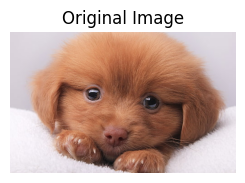

In [ ]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

In [ ]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

In [ ]:
# Sobel operators
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

In [ ]:
# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)


In [ ]:
# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Display the results
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(np.float64(-0.5), np.float64(495.5), np.float64(309.5), np.float64(-0.5))

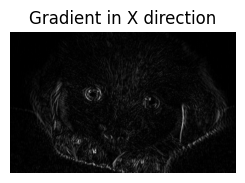

In [ ]:
# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

(np.float64(-0.5), np.float64(495.5), np.float64(309.5), np.float64(-0.5))

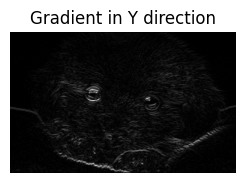

In [ ]:

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

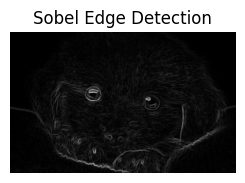

In [ ]:
# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

2.Canny Edge Detection

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image_path = '/content/Ball.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

In [ ]:
# Apply Canny edge detector
edges = cv2.Canny(blurred_image, 100, 200)

In [ ]:
# Display the result
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(np.float64(-0.5), np.float64(123.5), np.float64(124.5), np.float64(-0.5))

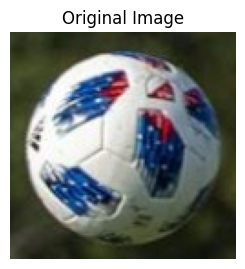

In [ ]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

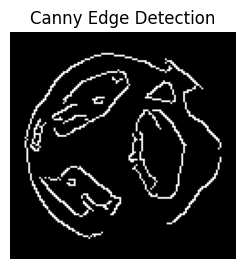

In [ ]:
# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

3.Prewitt Edge Detection

In [ ]:
def prewitt_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply horizontal Prewitt kernel
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)

    # Apply vertical Prewitt kernel
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)
    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Optional: Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

In [ ]:
# Read the input image
image = cv2.imread('/content/pet.jpg')

# Apply Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plotting both images using subplots
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(np.float64(-0.5), np.float64(495.5), np.float64(309.5), np.float64(-0.5))

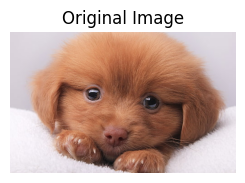

In [ ]:
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

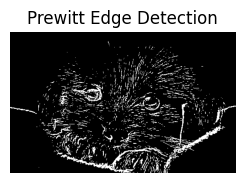

In [ ]:
# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.show()


4.Roberts Cross Edge Detection

In [ ]:
def roberts_cross_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Roberts Cross kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])

    # Convolve the image with the kernels
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)

    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)

    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)

    # Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)

    return edges

In [ ]:
# Read the input image
image = cv2.imread('/content/Ball.jpg')

In [ ]:
# Apply Roberts Cross edge detection with thresholding
edges = roberts_cross_edge_detection(image)

# Plotting both images using subplots
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(np.float64(-0.5), np.float64(123.5), np.float64(124.5), np.float64(-0.5))

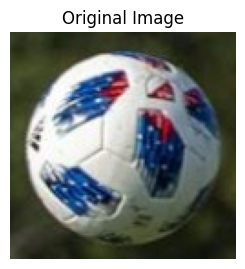

In [ ]:
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

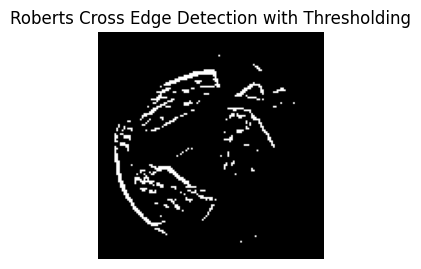

In [ ]:
# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Roberts Cross Edge Detection with Thresholding')
plt.axis('off')

plt.show()